In [1]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library datetime
import datetime as dt

# Import Library LinearRegression
from sklearn.linear_model import LinearRegression

# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

# Import Grafphic
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('susu.xls',  sheet_name="Raw Data")
df

,Month,Value
0,1962-01-01,578.3
1,1962-02-01,609.8
2,1962-03-01,628.4
3,1962-04-01,665.6
4,1962-05-01,713.8
...,...,...
151,1974-08-01,851.3
152,1974-09-01,826.9
153,1974-10-01,797.3
154,1974-11-01,784.3


In [3]:
len(df)

156

In [4]:
df.describe()

,Value
count,156.000000
mean,746.491667
std,98.594808
min,561.100000
25%,675.250000
50%,749.150000
75%,817.250000
max,960.800000


In [5]:
# Data cleaning
value =  []
convert = pd.to_datetime(df['Month'])
convert = df['Month'].map(dt.datetime.toordinal)
for x in convert:
  value.append(x)
df.insert(1, "Time", value, True)

In [6]:
df.head()

,Month,Time,Value
0,1962-01-01,716241,578.3
1,1962-02-01,716272,609.8
2,1962-03-01,716300,628.4
3,1962-04-01,716331,665.6
4,1962-05-01,716361,713.8


In [7]:
df.describe()

,Time,Value
count,156.000000,156.000000
mean,718599.076923,746.491667
std,1375.118512,98.594808
min,716241.000000,561.100000
25%,717419.250000,675.250000
50%,718599.000000,749.150000
75%,719778.500000,817.250000
max,720958.000000,960.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   156 non-null    datetime64[ns]
 1   Time    156 non-null    int64         
 2   Value   156 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.8 KB


In [9]:
df.corr()

,Time,Value
Time,1.000000,0.807901
Value,0.807901,1.000000


In [10]:
# Data Training
y = np.asarray(df['Value'])
X = df[['Time']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Regression Liniear
model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_) 
coefs = zip(model.coef_, X.columns)
model.__dict__
print("sl = %.1f + " % model.intercept_ + " + ".join("%.1f %s" % coef for coef in coefs))

Coefficient:  [0.05669814]
Intercept:  -39997.72522670058
sl = -39997.7 + 0.1 Time


In [12]:
# Score
model.score(x_test, y_test)

0.7014415617084142

Text(0.5, 1.0, 'Date vs Value')

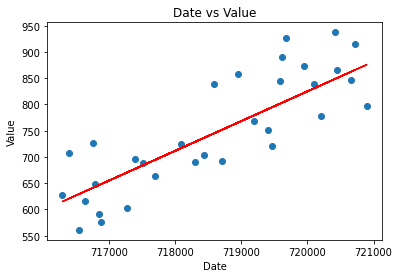

In [13]:
y_prediksi = model.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Date vs Value')

Cooficient = b;
Intercept = a;
Ybar = a + bX;

In [14]:
# Prediksi
tanggal = pd.to_datetime('1/1/1975')
tanggal = dt.datetime.toordinal(tanggal)
model.predict([[tanggal]])

array([881.00693204])